In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Algerian_Forest_Project.csv")
df.drop(labels=['month','day','year'],axis=1,inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region_Code,Classes_Coded
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [4]:
df['Classes_Coded'].value_counts()

Classes_Coded
0    137
1    106
Name: count, dtype: int64

In [5]:
X=df.iloc[:,[0,1,2,3,4,5,6,7,8,10,11]]
y=df.iloc[:,-3]

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape,X_test.shape

((182, 11), (61, 11))

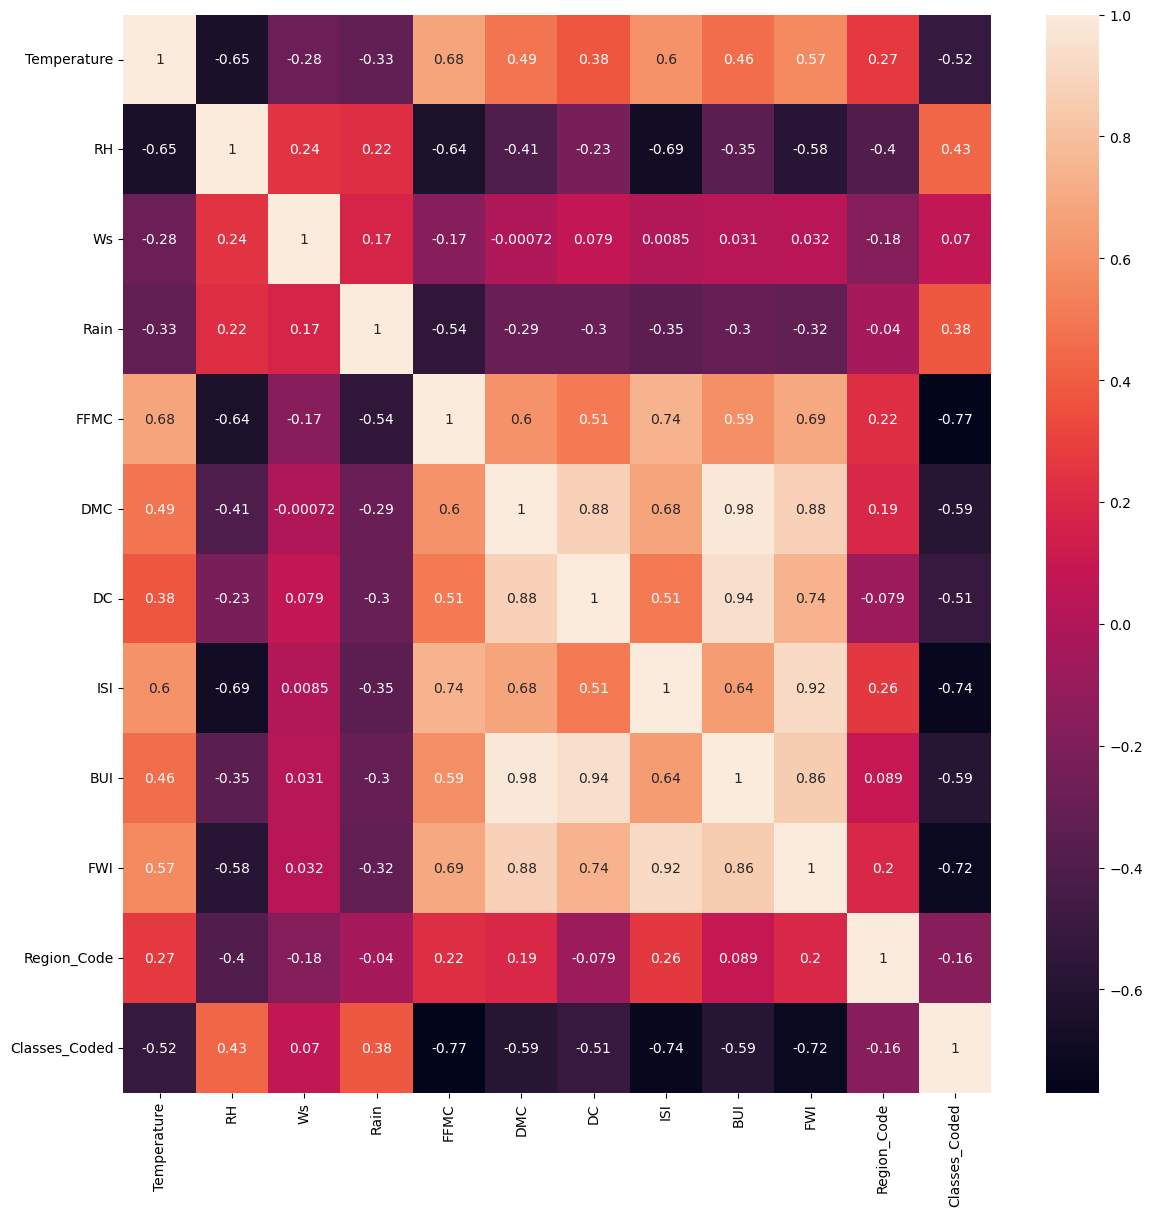

In [7]:
plt.figure(figsize=(14,14))
sns.heatmap(data=df.corr(),cmap='rocket',annot=True)
plt.show()

In [8]:
def Feature_Selection(dataset,threshold):
    features_to_remove=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i,j]>threshold)):
                features_to_remove.add(corr_matrix.columns[i])
    return features_to_remove

remove_cols=Feature_Selection(X_train,0.85)
X_train.drop(columns=remove_cols,axis=1,inplace=True)
X_test.drop(columns=remove_cols,axis=1,inplace=True)

In [26]:
#Standardisation
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_train_scaled.shape

(182, 9)

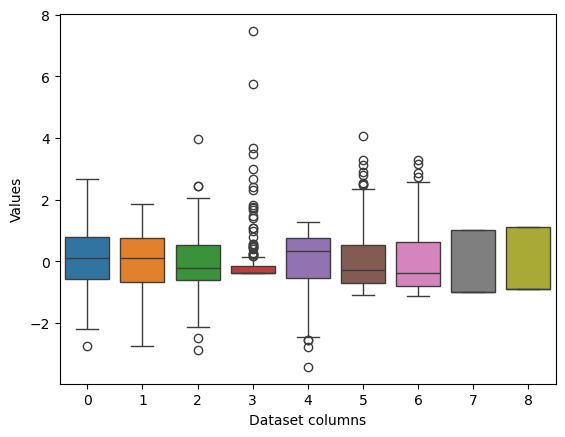

In [12]:
sns.boxplot(data=X_train_scaled)
plt.xlabel("Dataset columns")
plt.ylabel("Values")
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train_scaled,y_train)

LinearRegression()

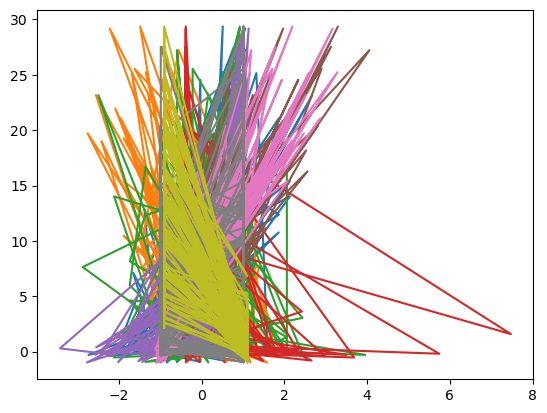

In [14]:
plt.plot(X_train_scaled,regression.predict(X_train_scaled))
plt.show()

In [15]:
y_pred=regression.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)
rmse=np.sqrt(mse)
print(mae,mse,rmse)


0.5468236465249994 0.6742766873791597 0.8211435242265263


In [16]:

rsquare_score=r2_score(y_test,y_pred)
print(rsquare_score)


0.9847657384266951


In [17]:

from sklearn.model_selection import cross_val_score
cv_Score=cross_val_score(regression,X_test_scaled,y_test,scoring="neg_mean_absolute_error",cv=5)
print(cv_Score)

[-0.89629627 -0.67413696 -0.63856827 -0.30880259 -0.85017586]


In [18]:
print(regression.coef_,regression.intercept_)

[-0.03634495 -0.17441065  0.00703214 -0.04108155 -0.82319823  3.6982583
  4.84057298 -0.39259928 -0.40422124] 7.156043956043957


In [19]:
import statsmodels.api as sm
OLS_regression=sm.OLS(y_train,X_train_scaled).fit()
Ols_y_pred=OLS_regression.predict(X_test_scaled)
print(OLS_regression.summary())

                                 OLS Regression Results                                
Dep. Variable:                    FWI   R-squared (uncentered):                   0.518
Model:                            OLS   Adj. R-squared (uncentered):              0.493
Method:                 Least Squares   F-statistic:                              20.67
Date:                Wed, 21 Jan 2026   Prob (F-statistic):                    2.22e-23
Time:                        01:43:34   Log-Likelihood:                         -619.50
No. Observations:                 182   AIC:                                      1257.
Df Residuals:                     173   BIC:                                      1286.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

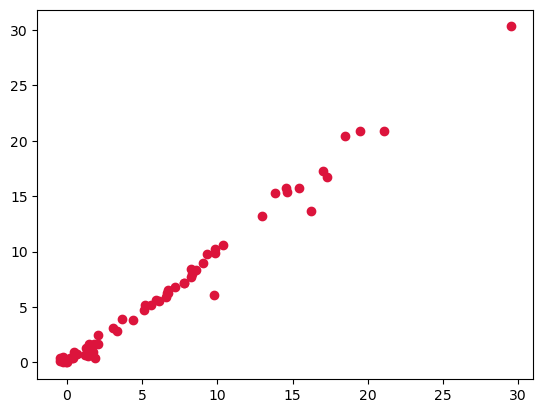

In [20]:
plt.scatter(y_pred,y_test,color="crimson")
plt.show()

In [21]:
from sklearn.linear_model import Lasso
lasso_Reg=Lasso()
lasso_Reg.fit(X_train_scaled,y_train)
y_pred=lasso_Reg.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)
rmse=np.sqrt(mse)
print(mae,mse,rmse,"\n")


rsquare_score=r2_score(y_test,y_pred)
print(rsquare_score)

#THOUGH R2 SCORE REDUCES IT DOES NOT MEAN MODEL HAS DOWNGRADED.... PREVIOUSLY IT MIGHT BE OVERFITTING

1.1331759949144085 2.2483458918974746 1.4994485292591655 

0.9492020263112388


In [22]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge()
ridge_reg.fit(X_train_scaled,y_train)
y_pred=ridge_reg.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)
rmse=np.sqrt(mse)
print(mae,mse,rmse,"\n")


rsquare_score=r2_score(y_test,y_pred)
print(rsquare_score)
print(scaler.transform([[29,57,18,0.0,65.7,3.4,7.6,1.3,1]]))
print(ridge_reg.predict(scaler.transform([[29,74,19,0.1,75.8,3.6,2.1,0,1]])))

0.5642305340105696 0.6949198918152084 0.8336185529456553 

0.9842993364555513
[[-0.84284248 -0.35227576  0.9200267  -0.38406017 -0.83345658 -0.89858211
   0.64362511  1.61108629  1.10431526]]
[0.82802211]


c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [23]:
from sklearn.linear_model import ElasticNet
ElasticNet_reg=ElasticNet()
ElasticNet_reg.fit(X_train_scaled,y_train)
y_pred=ElasticNet_reg.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)
rmse=np.sqrt(mse)
print(mae,mse,rmse,"\n")


rsquare_score=r2_score(y_test,y_pred)
print(rsquare_score)

1.8822353634896 5.517251101025224 2.3488829474933874 

0.8753460589519703


In [32]:
import pickle
pickle.dump(scaler,open("scaler.pkl","wb"))
pickle.dump(ridge_reg,open("ridge_reg.pkl","wb"))

In [33]:
model=pickle.load(open("ridge_reg.pkl","rb"))
scaler_func=pickle.load(open("scaler.pkl","rb"))
y_pred=model.predict(X_test_scaled)
from sklearn.metrics import r2_score
r_2_Score=r2_score(y_pred,y_test)
print(r_2_Score)
scaler_func.transform([[29,57,18,0.0,65.7,3.4,7.6,1.3,1]])
print(model.predict(scaler.transform([[29,74,19,0.1,75.8,3.6,2.1,0,1]])))

0.9834070933284212
[0.82802211]


c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [37]:
X_test

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Region_Code,Classes_Coded
24,31,64,15,0.0,86.7,14.2,5.7,0,0
6,33,54,13,0.0,88.2,9.9,6.4,0,0
152,28,58,18,2.2,63.7,3.2,1.2,1,1
232,34,58,13,0.2,79.5,18.7,2.1,1,1
238,30,65,14,0.0,85.4,16.0,4.5,1,0
...,...,...,...,...,...,...,...,...,...
162,34,56,15,2.9,74.8,7.1,1.6,1,1
178,33,57,16,0.0,87.5,15.7,6.7,1,0
224,31,72,14,0.0,84.2,8.3,3.8,1,0
230,36,33,13,0.1,90.6,25.8,9.0,1,0


In [38]:
y_test

24      8.4
6       7.2
152     0.5
232     3.8
238     6.5
       ... 
162     0.8
178     9.0
224     3.9
230    15.4
154     5.2
Name: FWI, Length: 61, dtype: float64